In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train=pd.read_excel("Data_Train.xlsx")

In [3]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
test=pd.read_excel("Test_set.xlsx")

In [5]:
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [6]:
train['source']='train'

In [7]:
test['source']='test'

In [8]:
df=pd.concat([train,test],axis=0,sort=False,ignore_index=True)

In [9]:
df.source.value_counts()

train    10683
test      2671
Name: source, dtype: int64

In [16]:
df.describe(include='all')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,source
count,13354,13354,13354,13354,13353,13354,13354,13354,13353,13354,10683.000000,13354
unique,12,44,5,6,132,223,1451,374,5,10,NaN,2
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info,NaN,train
freq,4746,633,5682,5682,3000,288,536,672,7056,10493,NaN,10683
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9087.064121,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4611.359167,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1759.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5277.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8372.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12373.000000,NaN


In [10]:
df.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
source                0
dtype: int64

In [33]:
approved_term = train[train['Total_Stops']=='Y']['Loan_Amount_Term'].value_counts()
unapproved_term = data_train[data_train['Loan_Status']=='N']['Loan_Amount_Term'].value_counts()
df = pd.DataFrame([approved_term,unapproved_term])
df.index = ['Approved','Unapproved']
df.plot(kind='bar', stacked=True, figsize=(15,8))

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,source
683,Jet Airways,1/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,04:25 02 Jun,13h 50m,2 stops,No info,13376.0,train
1061,Air India,21/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 22 May,21h 15m,2 stops,No info,10231.0,train
1348,Air India,18/05/2019,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,19:15 19 May,26h,2 stops,No info,12392.0,train
1418,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,In-flight meal not included,10368.0,train
1674,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,7303.0,train
1685,Jet Airways,9/05/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,12:35 10 May,13h 30m,2 stops,No info,15129.0,train
1704,IndiGo,09/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,6860.0,train
1807,Jet Airways,1/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,06:45,04:25 02 Jun,21h 40m,2 stops,In-flight meal not included,10919.0,train
1891,Jet Airways,1/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 02 Jun,26h 55m,2 stops,In-flight meal not included,10368.0,train
1971,Jet Airways,9/05/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,04:25 11 May,29h 20m,2 stops,No info,15129.0,train


In [11]:
df.shape

(13354, 12)

In [12]:
df[df['Total_Stops']=='nan.np']

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,source


In [35]:
import pandas_profiling as pp

C:\Users\VINOTH S\Anaconda3\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\VINOTH S\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\VINOTH S\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\VINOTH S\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\VINOTH S\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\VINOTH S\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 499, in start
    self.io_loop.start()
  

In [94]:
pp.ProfileReport(df_replace)

Number of variables,18
Number of observations,13354
Total Missing (%),1.1%
Total size in memory,1.8 MiB
Average record size in memory,140.0 B
Numeric,5
Categorical,10
Boolean,1
Date,1
Text (Unique),0
Rejected,1


In [13]:
df.Airline.value_counts()

Jet Airways                          4746
IndiGo                               2564
Air India                            2192
Multiple carriers                    1543
SpiceJet                             1026
Vistara                               608
Air Asia                              405
GoAir                                 240
Multiple carriers Premium economy      16
Jet Airways Business                    8
Vistara Premium economy                 5
Trujet                                  1
Name: Airline, dtype: int64

In [14]:
df.Price.max()

79512.0

In [15]:
df.query('Price'=79512.0)

SyntaxError: keyword can't be an expression (<ipython-input-15-aa61872ab7cf>, line 1)

In [16]:
df[df['Price']==79512.0]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,source
2924,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,05:45,11:25,5h 40m,1 stop,Business class,79512.0,train


In [43]:
df[df['Additional_Info']=='Business class']

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,source
2924,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,05:45,11:25,5h 40m,1 stop,Business class,79512.0,train
3032,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BDQ → DEL,05:50,12:20,6h 30m,1 stop,Business class,28097.0,train
5372,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,05:45,12:25,6h 40m,1 stop,Business class,62427.0,train
10364,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → MAA → DEL,09:45,14:25,4h 40m,1 stop,Business class,57209.0,train
12485,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,05:45,13:15,7h 30m,1 stop,Business class,NaN,test


In [17]:
df['Date_of_Journey_new'] = pd.to_datetime(df.Date_of_Journey)

In [18]:
df['Journey_quarter'] = df['Date_of_Journey_new'].dt.quarter

In [19]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,source,Date_of_Journey_new,Journey_quarter
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,train,2019-03-24,1
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,train,2019-01-05,1
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,train,2019-09-06,3
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,train,2019-12-05,4
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,train,2019-01-03,1


In [20]:
df['Date_journey_day'] = df['Date_of_Journey_new'].dt.day

df[['Date_of_Journey_new', 'Date_journey_day']].head()

,Date_of_Journey_new,Date_journey_day
0,2019-03-24,24
1,2019-01-05,5
2,2019-09-06,6
3,2019-12-05,5
4,2019-01-03,3


In [21]:
df['Date_Journey_dayofweek'] = df['Date_of_Journey_new'].dt.dayofweek

df[['Date_of_Journey_new', 'Date_Journey_dayofweek']].head()

,Date_of_Journey_new,Date_Journey_dayofweek
0,2019-03-24,6
1,2019-01-05,5
2,2019-09-06,4
3,2019-12-05,3
4,2019-01-03,3


In [24]:
# day of the week - name

df['Date_Journey_dayweek'] = df['Date_of_Journey_new'].dt.weekday_name

df[['Date_of_Journey_new', 'Date_Journey_dayweek']].head()

,Date_of_Journey_new,Date_Journey_dayweek
0,2019-03-24,Sunday
1,2019-01-05,Saturday
2,2019-09-06,Friday
3,2019-12-05,Thursday
4,2019-01-03,Thursday


In [25]:

# was the application done on the weekend?

df['Date_Journey_is_weekend'] = np.where(df['Date_Journey_dayweek'].isin(['Sunday', 'Saturday']), 1,0)
df[['Date_of_Journey_new', 'Date_Journey_dayweek','Date_Journey_is_weekend']].head()

,Date_of_Journey_new,Date_Journey_dayweek,Date_Journey_is_weekend
0,2019-03-24,Sunday,1
1,2019-01-05,Saturday,1
2,2019-09-06,Friday,0
3,2019-12-05,Thursday,0
4,2019-01-03,Thursday,0


In [26]:
df['Date_Journey_year'] = df['Date_of_Journey_new'].dt.year

df[['Date_of_Journey_new', 'Date_Journey_year']].head()

,Date_of_Journey_new,Date_Journey_year
0,2019-03-24,2019
1,2019-01-05,2019
2,2019-09-06,2019
3,2019-12-05,2019
4,2019-01-03,2019


In [27]:
df.Date_Journey_year.value_counts()

2019    13354
Name: Date_Journey_year, dtype: int64

In [28]:
df.drop(columns=["Date_Journey_year"],inplace=True)

In [29]:
df.Total_Stops.value_counts()

1 stop      7056
non-stop    4340
2 stops     1899
3 stops       56
4 stops        2
Name: Total_Stops, dtype: int64

In [80]:
df[df['Total_Stops']=='non-stop']

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,source,Date_of_Journey_new,Journey_quarter,Date_journey_day,Date_Journey_dayofweek,Date_Journey_dayweek,Date_Journey_is_weekend,Date_Journey_year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,train,2019-03-24,1,24,6,Sunday,1,2019
5,SpiceJet,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873.0,train,2019-06-24,2,24,0,Monday,0,2019
11,IndiGo,Kolkata,Banglore,CCU → BLR,20:20,22:55,2h 35m,non-stop,No info,4174.0,train,2019-04-18,2,18,3,Thursday,0,2019
12,Air India,Chennai,Kolkata,MAA → CCU,11:40,13:55,2h 15m,non-stop,No info,4667.0,train,2019-06-24,2,24,0,Monday,0,2019
14,IndiGo,Kolkata,Banglore,CCU → BLR,17:15,19:50,2h 35m,non-stop,No info,4804.0,train,2019-04-24,2,24,2,Wednesday,0,2019
22,IndiGo,Banglore,Delhi,BLR → DEL,04:00,06:50,2h 50m,non-stop,No info,3943.0,train,2019-03-04,1,4,0,Monday,0,2019
23,IndiGo,Banglore,Delhi,BLR → DEL,18:55,21:50,2h 55m,non-stop,No info,4823.0,train,2019-01-05,1,5,5,Saturday,1,2019
28,Vistara,Banglore,Delhi,BLR → DEL,09:45,12:35,2h 50m,non-stop,No info,4668.0,train,2019-06-18,2,18,1,Tuesday,0,2019
29,Vistara,Chennai,Kolkata,MAA → CCU,07:05,09:20,2h 15m,non-stop,No info,3687.0,train,2019-06-15,2,15,5,Saturday,1,2019
30,Vistara,Chennai,Kolkata,MAA → CCU,07:05,09:20,2h 15m,non-stop,No info,3687.0,train,2019-06-18,2,18,1,Tuesday,0,2019


TypeError: unsupported operand type(s) for /: 'str' and 'int'

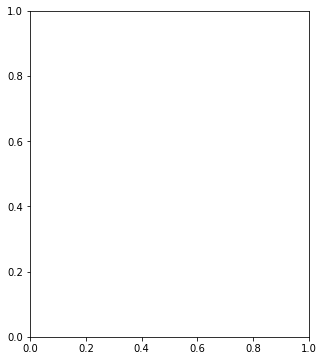

In [30]:
df.boxplot('Dep_Time','Airline',rot = 30,figsize=(5,6))

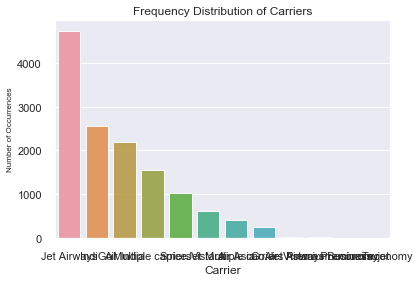

In [87]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
carrier_count = df['Airline'].value_counts()
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
plt.title('Frequency Distribution of Carriers')
plt.ylabel('Number of Occurrences', fontsize=8)
plt.xlabel('Carrier', fontsize=12)
plt.show()

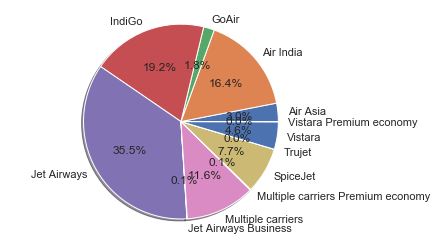

In [88]:
labels = df['Airline'].astype('category').cat.categories.tolist()
counts = df['Airline'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

In [31]:
replace_map = {'Airline': {'Jet Airways': 1, 'IndiGo': 2, 'Air India': 3, 'Multiple carriers': 4,'SpiceJet': 5, 'Vistara': 6, 'Air Asia': 7 , 'GoAir': 8 , 'Multiple carriers Premium economy': 9,'Jet Airways Business': 10,'Vistara Premium economy': 11,'Trujet': 12}}

In [32]:
df.Airline.value_counts()

Jet Airways                          4746
IndiGo                               2564
Air India                            2192
Multiple carriers                    1543
SpiceJet                             1026
Vistara                               608
Air Asia                              405
GoAir                                 240
Multiple carriers Premium economy      16
Jet Airways Business                    8
Vistara Premium economy                 5
Trujet                                  1
Name: Airline, dtype: int64

In [33]:
labels = df['Airline'].astype('category').cat.categories.tolist()
replace_map_comp = {'Airline' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}

print(replace_map_comp)

{'Airline': {'Air Asia': 1, 'Air India': 2, 'GoAir': 3, 'IndiGo': 4, 'Jet Airways': 5, 'Jet Airways Business': 6, 'Multiple carriers': 7, 'Multiple carriers Premium economy': 8, 'SpiceJet': 9, 'Trujet': 10, 'Vistara': 11, 'Vistara Premium economy': 12}}


In [34]:
df_replace = df.copy()

In [35]:
df_replace.replace(replace_map_comp, inplace=True)

print(df_replace.head())

   Airline Date_of_Journey    Source Destination                  Route  \
0        4      24/03/2019  Banglore   New Delhi              BLR → DEL   
1        2       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2        5       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3        4      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4        4      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info    Price source  \
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897.0  train   
1    05:50         13:15   7h 25m     2 stops         No info   7662.0  train   
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882.0  train   
3    18:05         23:30   5h 25m      1 stop         No info   6218.0  train   
4    16:50         21:35   4h 45m      1 stop         No info  13302.0  train   

  Date_of_Journey_new  Journey_quarter  Date_journey_day  \
0 

In [36]:
print(df_replace['Airline'].dtypes)

int64


In [37]:
df.Destination.value_counts()

Cochin       5682
Banglore     3581
Delhi        1582
New Delhi    1170
Hyderabad     883
Kolkata       456
Name: Destination, dtype: int64

In [38]:
df_replace.Additional_Info.unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [39]:
df_replace.Additional_Info.replace({"No info":"No Info"},inplace=True)

In [40]:
df_replace.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,source,Date_of_Journey_new,Journey_quarter,Date_journey_day,Date_Journey_dayofweek,Date_Journey_dayweek,Date_Journey_is_weekend
0,4,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No Info,3897.0,train,2019-03-24,1,24,6,Sunday,1
1,2,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No Info,7662.0,train,2019-01-05,1,5,5,Saturday,1
2,5,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No Info,13882.0,train,2019-09-06,3,6,4,Friday,0
3,4,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No Info,6218.0,train,2019-12-05,4,5,3,Thursday,0
4,4,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No Info,13302.0,train,2019-01-03,1,3,3,Thursday,0


In [46]:
df_replace.Total_Stops.value_counts()

One      7056
Zero     4340
Two      1899
Three      56
Four        2
Name: Total_Stops, dtype: int64

In [42]:
replace_map = {'Total_Stops': {'non-stop': 'Zero', '1 stop': 'One', '2 stop': 'Two', '3 stops': 'Three','4 stops': 'Four'}}

In [43]:
labels = df_replace['Total_Stops'].astype('category').cat.categories.tolist()
replace_map_comp = {'Total_Stops' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}

print(replace_map_comp)

{'Total_Stops': {'1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4, 'non-stop': 5}}


In [44]:
df_replace.Total_Stops.replace({'non-stop': 'Zero', '1 stop': 'One', '2 stops': 'Two', '3 stops': 'Three','4 stops': 'Four'},inplace=True)

In [45]:
df_replace.Route.nunique()

132

In [47]:
catagorical_columns=df_replace.select_dtypes(include='object')

In [48]:
catagorical_columns.head()

,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,source,Date_Journey_dayweek
0,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,Zero,No Info,train,Sunday
1,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,Two,No Info,train,Saturday
2,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,Two,No Info,train,Friday
3,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,One,No Info,train,Thursday
4,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,One,No Info,train,Thursday


In [49]:
numerical_columns=df_replace.select_dtypes(exclude='object')

In [50]:
numerical_columns.head()

,Airline,Price,Date_of_Journey_new,Journey_quarter,Date_journey_day,Date_Journey_dayofweek,Date_Journey_is_weekend
0,4,3897.0,2019-03-24,1,24,6,1
1,2,7662.0,2019-01-05,1,5,5,1
2,5,13882.0,2019-09-06,3,6,4,0
3,4,6218.0,2019-12-05,4,5,3,0
4,4,13302.0,2019-01-03,1,3,3,0


In [54]:
encode=pd.get_dummies(catagorical_columns.drop(columns=["Route","Dep_Time","Arrival_Time","Duration","source","Date_Journey_dayweek","Date_of_Journey"]))

In [55]:
encode.head()

,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,...,Total_Stops_Zero,Additional_Info_1 Long layover,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_Red-eye flight
0,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [56]:
encode1=pd.get_dummies(numerical_columns.drop(columns=["Price","Date_of_Journey_new","Date_journey_day"]))

In [57]:
encode1.head()

,Airline,Journey_quarter,Date_Journey_dayofweek,Date_Journey_is_weekend
0,4,1,6,1
1,2,1,5,1
2,5,3,4,0
3,4,4,3,0
4,4,1,3,0


In [138]:
df_replace['Airline'].dtypes

dtype('O')

In [137]:
df_replace['Airline']=df_replace['Airline'].astype('object')

In [142]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,source,Date_of_Journey_new,Journey_quarter,Date_journey_day,Date_Journey_dayofweek,Date_Journey_dayweek,Date_Journey_is_weekend,Date_Journey_year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,train,2019-03-24,1,24,6,Sunday,1,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,train,2019-01-05,1,5,5,Saturday,1,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,train,2019-09-06,3,6,4,Friday,0,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,train,2019-12-05,4,5,3,Thursday,0,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,train,2019-01-03,1,3,3,Thursday,0,2019


In [143]:
df_replace.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,source,Date_of_Journey_new,Journey_quarter,Date_journey_day,Date_Journey_dayofweek,Date_Journey_dayweek,Date_Journey_is_weekend,Date_Journey_year
0,4,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,Zero,No Info,3897.0,train,2019-03-24,1,24,6,Sunday,1,2019
1,2,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,Two,No Info,7662.0,train,2019-01-05,1,5,5,Saturday,1,2019
2,5,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,Two,No Info,13882.0,train,2019-09-06,3,6,4,Friday,0,2019
3,4,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,One,No Info,6218.0,train,2019-12-05,4,5,3,Thursday,0,2019
4,4,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,One,No Info,13302.0,train,2019-01-03,1,3,3,Thursday,0,2019


In [58]:
processing_final=pd.concat([encode,encode1,numerical_columns["Price"],df[["source"]]],axis=1)

In [59]:
processing_final.isnull().sum()

Source_Banglore                                    0
Source_Chennai                                     0
Source_Delhi                                       0
Source_Kolkata                                     0
Source_Mumbai                                      0
Destination_Banglore                               0
Destination_Cochin                                 0
Destination_Delhi                                  0
Destination_Hyderabad                              0
Destination_Kolkata                                0
Destination_New Delhi                              0
Total_Stops_Four                                   0
Total_Stops_One                                    0
Total_Stops_Three                                  0
Total_Stops_Two                                    0
Total_Stops_Zero                                   0
Additional_Info_1 Long layover                     0
Additional_Info_1 Short layover                    0
Additional_Info_2 Long layover                

In [60]:
processing_final.source.value_counts()

train    10683
test      2671
Name: source, dtype: int64

In [61]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [62]:
pre_train = processing_final.loc[processing_final['source']=="train"]

In [63]:
pre_test = processing_final.loc[processing_final['source']=="test"]

In [64]:
del pre_train["source"]

In [65]:
del pre_test["source"]

In [66]:
X=pre_train.drop(columns=["Price"],axis=0)

In [67]:
y=pre_train.Price

In [68]:
lm=LinearRegression()

In [69]:
lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [70]:
y_train_predict=lm.predict(X)

In [71]:
y_test_predict = lm.predict(pre_test.drop(["Price"],axis=1))

In [72]:
from sklearn import metrics

In [73]:
np.sqrt(metrics.mean_squared_error(y,y_train_predict))

3267.878548050919

In [74]:
Final=pre_test[["Price"]]

In [75]:
Final["Price"]=y_test_predict

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [76]:
Final.to_excel("LRPrice.xlsx",index=False)

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression(random_state=0)
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=2, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [78]:
y_pred_train = logreg.predict(X_train)

In [79]:
metrics.confusion_matrix(y_train,y_pred_train)

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0, 22, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=int64)

In [80]:
metrics.accuracy_score(y_train,y_pred_train)


0.24979941160738164

In [81]:
print(metrics.classification_report(y_train,y_pred_train))

             precision    recall  f1-score   support

     1759.0       0.00      0.00      0.00         2
     1840.0       0.00      0.00      0.00         1
     1965.0       0.61      1.00      0.76        22
     2017.0       0.47      1.00      0.64        27
     2050.0       0.00      0.00      0.00         6
     2071.0       0.00      0.00      0.00         5
     2175.0       0.00      0.00      0.00         4
     2227.0       0.00      0.00      0.00        30
     2228.0       0.00      0.00      0.00         6
     2385.0       0.00      0.00      0.00         6
     2437.0       0.00      0.00      0.00         4
     2470.0       0.00      0.00      0.00         2
     2575.0       0.00      0.00      0.00         7
     2647.0       0.00      0.00      0.00         4
     2753.0       0.00      0.00      0.00         8
     2754.0       0.29      0.44      0.35        39
     2759.0       0.00      0.00      0.00         2
     3100.0       0.54      1.00      0.70   

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [82]:
y_pred = logreg.predict(X_test)

In [83]:
metrics.confusion_matrix(y_test,y_pred)

array([[ 0,  0,  2, ...,  0,  0,  0],
       [ 0, 14,  0, ...,  0,  0,  0],
       [ 0,  0,  8, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  1,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=int64)

In [84]:
metrics.accuracy_score(y_test,y_pred)

0.21528861154446177

In [86]:
logreg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=2, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [87]:
train_pred=logreg.predict(pre_train.drop(columns=["Price"],axis=0))

In [88]:
test_pred=logreg.predict(pre_test.drop(columns=["Price"],axis=0))

In [89]:

metrics.accuracy_score(pre_train["Price"],train_pred)

0.24309650847140316

In [90]:
Final["Price"]=test_pred.astype(int)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [92]:
Final.to_excel("LogistPrice1.xlsx",index=False)

In [188]:
from sklearn.linear_model import ridge_regression
from sklearn import metrics
ridgeReg = ridge_regression(X,y,alpha=0.05)

In [190]:
y_pred_rid = ridgeReg.predict(X)

AttributeError: 'numpy.ndarray' object has no attribute 'predict'

In [93]:
x_train,x_test,y_train,y_test = train_test_split(X,y,train_size = 0.7,random_state=42)

In [94]:
# Adaboost Classifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
#dtree = DecisionTreeClassifier(criterion='entropy',max_depth=2,random_state=42)

dtree = RandomForestRegressor(criterion='mse',max_depth=5,random_state=42)

adabst_fit = AdaBoostRegressor(base_estimator= dtree,
        n_estimators=22,learning_rate=0.05,random_state=42)

adabst_fit.fit(x_train, y_train)

##print ("\nAdaBoost - Train Confusion Matrix\n\n",pd.crosstab(y_train,adabst_fit.predict(x_train),rownames = ["Actuall"],colnames = ["Predicted"]))      
##print ("\nAdaBoost  - Train Classification Report\n",classification_report(y_train,adabst_fit.predict(x_train)))

#print ("\n\nAdaBoost  - Test Confusion Matrix\n\n",pd.crosstab(y_test,adabst_fit.predict(x_test),rownames = ["Actuall"],colnames = ["Predicted"]))      
#print ("\nAdaBoost  - Test accuracy",round(accuracy_score(y_test,adabst_fit.predict(x_test)),3))
#print ("\nAdaBoost - Test Classification Report\n",classification_report(y_test,adabst_fit.predict(x_test)))


AdaBoostRegressor(base_estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
         learning_rate=0.05, loss='linear', n_estimators=22,
         random_state=42)

In [96]:
dtree.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [112]:
dtree_pred1=dtree.predict(X)

In [113]:
dtree_pred=dtree.predict(pre_test.drop(columns=["Price"],axis=0))

In [111]:
dtree.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [114]:
Final["Price"]=dtree_pred.astype(int)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [115]:
Final.to_excel("RFPrice.xlsx",index=False)

In [116]:
adabst_fit.fit(X,y)

AdaBoostRegressor(base_estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
         learning_rate=0.05, loss='linear', n_estimators=22,
         random_state=42)

In [117]:
adabst_train_pred=adabst_fit.predict(X)

In [118]:
adabst_test_pred=adabst_fit.predict(pre_test.drop(columns=["Price"],axis=0))

In [119]:
Final["Price"]=adabst_test_pred.astype(int)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [120]:
Final.to_excel("adabstPrice.xlsx",index=False)